<a href="https://colab.research.google.com/github/BelikMary/Electronic_content_development/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Обработка первой статьи**

Это [облако тегов №1](https://wordart.com/ebu00yw9i2y7/%D0%BE%D0%B4%D0%BD%D0%B0%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0%D0%B0_%D0%BF%D1%80%D0%BE%D1%84%D0%B0%D0%B9%D0%BB%D0%B8%D0%BD%D0%B3-%D0%B2%20%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%82%D0%B8%D0%BD%D0%B3%D0%B5%20%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B0%D1%85_%D0%B1%D0%B5%D0%BB%D0%B8%D0%BA%D0%BC%D0%BA)

*Предобработка текста*

In [3]:
#открываем файл
f = open('marketing.txt', "r", encoding="utf-8")
text = f.read()

In [4]:
#подсчет длины текста
len(text)

7875

In [5]:
#перевод символов в единый регистр
text = text.lower()

In [6]:
#очистка текста от знаков пунктуации
import string

spec_chars = string.punctuation + '\n\xa0\t—…()'

def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [7]:
#проверка, что текст отчищен
#text

*Токенизация текста*

Для последующей обработки очищенный текст необходимо разбить на составные части – токены. В анализе текста на естественном языке применяется разбиение на символы, слова и предложения. Процесс разбиения называется токенизация. Для нашей задачи частотного анализа необходимо разбить текст на слова.

In [8]:
text_token=text.split()

In [9]:
len(text_token)

964

In [11]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [14]:
#получение длины списка токенов
len(text_tokens)

964

In [15]:
#Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку:
import nltk
text = nltk.Text(text_tokens)

In [16]:
print(type(text))

<class 'nltk.text.Text'>


*Подсчёт статистики встречаемости слов в тексте*

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)

In [18]:
fdist

FreqDist({'и': 60, 'в': 23, 'для': 16, 'тип': 15, 'на': 13, 'профайлинг': 13, 'к': 12, 'типа': 12, 'или': 10, 'они': 10, ...})

Сейчас самыми частыми словами являются союзы, предлоги и т.д., это надо исправить!

*Удаление стоп-слов*

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words("russian")

In [20]:
filtered_tokens = [word for word in text_tokens if word not in stop_words]

#print(filtered_tokens)

*Выделение корня слова*

Т.к. слова могут иметь разное окончание, то для чистоты эксперимента выделим корень слова

In [21]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")

lemmatized_words = [stemmer.stem(word) for word in filtered_tokens]
#print(lemmatized_words)

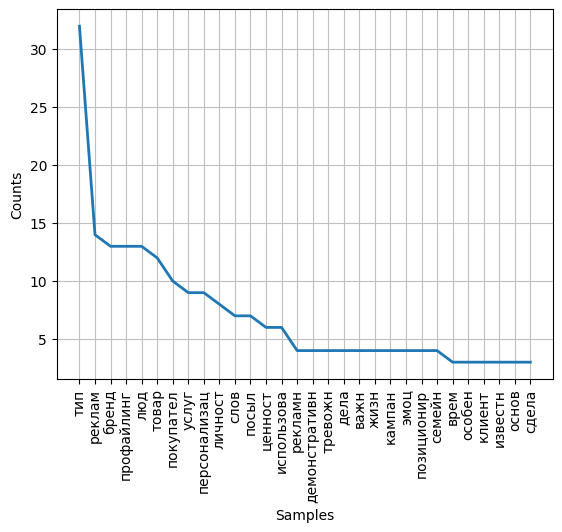

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
fdist = FreqDist(lemmatized_words)
fdist.plot(30,cumulative=False)

# **Обработка второй статьи**

Это [облако тегов №2](https://wordart.com/scuw9sruv5mp/%D0%BE%D0%B4%D0%BD%D0%B0-%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0_%D0%BF%D1%80%D0%BE%D1%84%D0%B0%D0%B9%D0%BB%D0%B8%D0%BD%D0%B3%20%D0%B2%20hr_%D0%B1%D0%B5%D0%BB%D0%B8%D0%BA%D0%BC%D0%BA)

In [23]:
#открываем файл
d = open('hr.txt', "r", encoding="utf-8")
text2 = d.read()

In [24]:
#подсчет длины текста
len(text2)

6302

In [25]:
#перевод символов в единый регистр
text2 = text2.lower()

In [26]:
#очистка текста от знаков пунктуации
import string

spec_chars = string.punctuation + '\n\xa0\t—…()–'

def remove_chars_from_text2(text2, chars):
    return "".join([ch for ch in text2 if ch not in chars])

text2 = remove_chars_from_text2(text2, spec_chars)
text2 = remove_chars_from_text2(text2, string.digits)

In [27]:
#проверка, что текст отчищен
#text2

In [28]:
#токенизация текста
from nltk import word_tokenize
text2_tokens = word_tokenize(text2)

In [29]:
#получение длины списка токенов
len(text2_tokens)

741

In [30]:
#Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку:
import nltk
text2 = nltk.Text(text2_tokens)

In [31]:
#удаление стоп-слов
filtered_tokens2 = [word for word in text2_tokens if word not in stop_words]

#print(filtered_tokens2)

In [32]:
#выделение корня слова
lemmatized_words2 = [stemmer.stem(word) for word in filtered_tokens2]
#print(lemmatized_words2)

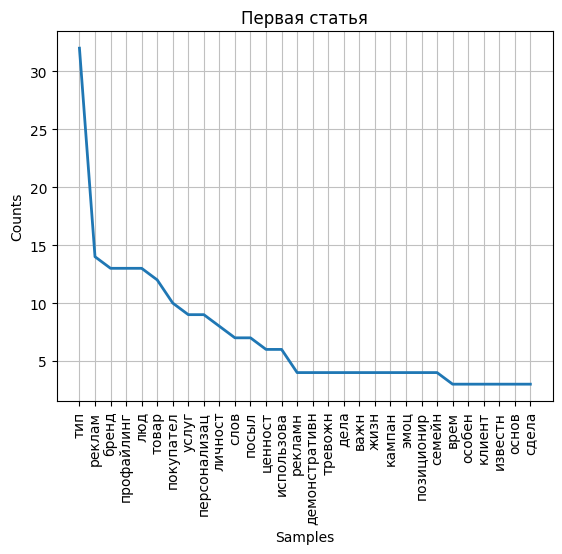

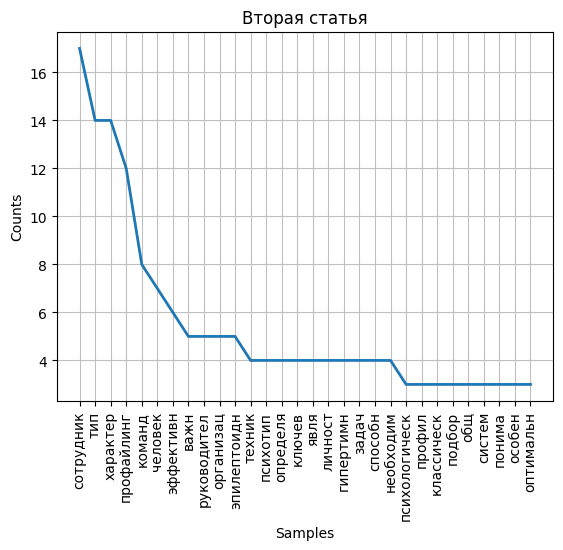

<Axes: title={'center': 'Вторая статья'}, xlabel='Samples', ylabel='Counts'>

In [34]:
fdist2 = FreqDist(lemmatized_words2)
fdist.plot(30,cumulative=False, title='Первая статья')
fdist2.plot(30,cumulative=False, title='Вторая статья')